## Regional Occupation Analysis with an emphisis on IT Computer job types. BLS Data lasted data is used, May 2018

Import dependencies & configure gmaps with your API key

In [82]:
# Dependencies and Setup
import requests
import json
import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import time
from config import gkey
import gmaps

Get the occupation information from the API of U.S. Bureau of Labor Statisics (BLS) .


In [83]:
# headers = {'Content-type': 'application/json'}
# data = json.dumps({"seriesid": ['LNS14000000','CUUR0000SA0','CES0000000001','LNS14000006','CUSR0000SA0','LNS11300000','CUUR0000SA0L1E','CES3000000001','CES0500000003','LNU04000000','PCU327320327320','PCU33312033312014','LNS12000000','CUSR0000SA0L1E','CUUR0000SAM1','CUUR0000SEMC01','LNS12300000','LNS12035019','CUUR0000SEMC','CUUR0000SS5702','CUUR0000SS5703','CUUR0000SEMC02','CES0500000001','CUUR0100SEMC','CUUR0100SAM1'],"startyear":"2011", "endyear":"2014"})
# p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
# json_data = json.loads(p.text)

# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(json_data)

In [84]:
# test = [{"seriesID":"LNS14000000"},
# {"seriesID":"CUUR0000SA0"},
# {"seriesID":"CES0000000001"},
# {"seriesID":"LNS14000006"},
# {"seriesID":"CUSR0000SA0"},
# {"seriesID":"LNS11300000"},
# {"seriesID":"CUUR0000SA0L1E"},
# {"seriesID":"CES3000000001"},
# {"seriesID":"CES0500000003"},
# {"seriesID":"LNU04000000"},
# {"seriesID":"PCU327320327320"},
# {"seriesID":"PCU33312033312014"},
# {"seriesID":"LNS12000000"},
# {"seriesID":"CUSR0000SA0L1E"},
# {"seriesID":"CUUR0000SAM1"},
# {"seriesID":"CUUR0000SEMC01"},
# {"seriesID":"LNS12300000"},
# {"seriesID":"LNS12035019"},
# {"seriesID":"CUUR0000SEMC"},
# {"seriesID":"CUUR0000SS5702"},
# {"seriesID":"CUUR0000SS5703"},
# {"seriesID":"CUUR0000SEMC02"},
# {"seriesID":"CES0500000001"},
# {"seriesID":"CUUR0100SEMC"},
# {"seriesID":"CUUR0100SAM1"}]
# str = ''
# for sers in test:
#     str+= sers.get('seriesID') + "','"

The BLS API's are not providing all of the information we need. So, we are downloading the csv\xls files from the BLS site and loading them into the data frames. https://www.bls.gov/


First we pulled the State data and analyze the Occupation Code  and want to see them broken by state/regions to do our analysis.

In [85]:
# Pull latest data available as of May 2018
#state_data = pd.read_excel("../Resources/State_M2018_dl.xlsx")
state_data = pd.read_csv("../Resources/BLS_state_M2018_dl.csv")

state_data.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,46.01,63.87,90.06,"48,650","68,030","95,710","132,860","187,330",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,91.31,#,#,"79,530","125,570","189,920",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,48.55,70.79,#,"50,180","68,990","100,980","147,250",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,*,*,*,"16,310","17,390","19,210","32,290","63,390",True,NaN


We want to analyze the data by regions, so we are using a csv available which has a mapping of the regions to the state.

In [86]:
state_region_map = pd.read_csv("../Resources/us_census_bureau_regions_and_divisions.csv")
state_region_map.head()


,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [87]:
# Merge the files
state_region_data = state_data.merge(state_region_map, how="left", left_on="ST", right_on="State Code")
state_region_data.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,State,State Code,Region,Division
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,"22,400","33,740","53,310","79,630",NaN,NaN,Alabama,AL,South,East South Central
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,"68,030","95,710","132,860","187,330",NaN,NaN,Alabama,AL,South,East South Central
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,"125,570","189,920",#,#,NaN,NaN,Alabama,AL,South,East South Central
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,"68,990","100,980","147,250",#,NaN,NaN,Alabama,AL,South,East South Central
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,"17,390","19,210","32,290","63,390",True,NaN,Alabama,AL,South,East South Central


The data for jobs numbers (employee numbers) is at various levels, for example 15-0000 represents all of "Computers and Mathematics" and 15-1111 is for sub-category "Computer and Information Research Scientists". 
So, we are only selecting the Group "Major" which is the major category level so we dont have incorrect numbers.
Also the data had some challenges like having ** in there or "non numberical" numbers which we cleaned.

In [88]:
# Clean up the data
state_region_data['TOT_EMP'].replace(to_replace=',', value='', regex=True, inplace=True)
state_region_data['TOT_EMP'].replace(to_replace='\*', value='0', regex=True, inplace=True)
state_region_data['TOT_EMP'].replace(to_replace=' ', value='0', regex=True, inplace=True)
state_region_data['TOT_EMP'].replace('', '0', inplace=True)
#print(state_region_data['TOT_EMP'].tolist())
state_region_data = state_region_data.astype({'TOT_EMP': 'int32'})
state_region_data_major = state_region_data[state_region_data["OCC_GROUP"] == "major"]
state_region_data_major.head()


,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,State,State Code,Region,Division
1,1,AL,Alabama,11-0000,Management Occupations,major,73860,1.1,38.001,0.72,...,"68,030","95,710","132,860","187,330",NaN,NaN,Alabama,AL,South,East South Central
34,1,AL,Alabama,13-0000,Business and Financial Operations Occupations,major,74370,1.2,38.262,0.72,...,"47,740","64,830","87,920","112,520",NaN,NaN,Alabama,AL,South,East South Central
63,1,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,41560,2.2,21.381,0.71,...,"57,270","79,020","105,330","133,720",NaN,NaN,Alabama,AL,South,East South Central
80,1,AL,Alabama,17-0000,Architecture and Engineering Occupations,major,43510,1.7,22.386,1.27,...,"59,260","82,700","112,980","140,290",NaN,NaN,Alabama,AL,South,East South Central
114,1,AL,Alabama,19-0000,"Life, Physical, and Social Science Occupations",major,8560,2.1,4.403,0.54,...,"43,150","56,130","77,330","106,810",NaN,NaN,Alabama,AL,South,East South Central


We are doing a group by the region on this data

In [89]:
region_data_major_group = state_region_data_major.groupby(['Region', 'OCC_TITLE'])

In [90]:
# Create DataFrame
region_data_major = region_data_major_group['TOT_EMP'].sum()
region_data_major = pd.DataFrame(region_data_major)

print(region_data_major.head())
region_data_major = region_data_major.reset_index()

                                                            TOT_EMP
Region  OCC_TITLE                                                  
Midwest Architecture and Engineering Occupations             590470
        Arts, Design, Entertainment, Sports, and Media ...   386630
        Building and Grounds Cleaning and Maintenance O...   934020
        Business and Financial Operations Occupations       1617950
        Community and Social Service Occupations             469790


To make it easy for creating arrays to use in plot, we have used pivot on Regions

In [91]:
#region_data_major = region_data_major.reset_index()
#region_data_major.Region.unique()
#region_data_major.head()
region_data_major["OCC_TITLE"] = region_data_major["OCC_TITLE"].str.replace("Occupations", "", case = False)
print(region_data_major.head())

major_regions = region_data_major.pivot(index='OCC_TITLE', columns='Region', values='TOT_EMP')
major_regions.head()


    Region                                        OCC_TITLE  TOT_EMP
0  Midwest                    Architecture and Engineering    590470
1  Midwest  Arts, Design, Entertainment, Sports, and Media    386630
2  Midwest   Building and Grounds Cleaning and Maintenance    934020
3  Midwest               Business and Financial Operations   1617950
4  Midwest                    Community and Social Service    469790


Region,Midwest,Northeast,South,West
OCC_TITLE,,,,
Architecture and Engineering,590470,416160,876680,672920
"Arts, Design, Entertainment, Sports, and Media",386630,417820,608290,538460
Building and Grounds Cleaning and Maintenance,934020,837490,1613610,1036850
Business and Financial Operations,1617950,1485040,2689820,1928470
Community and Social Service,469790,525660,635950,540440


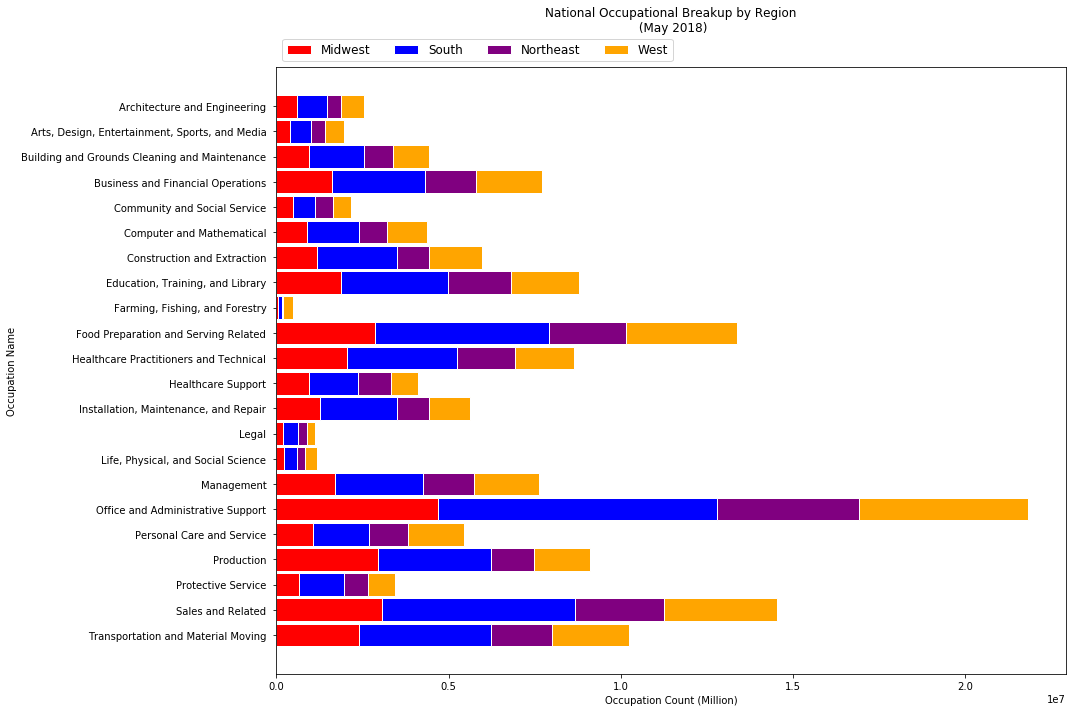

In [92]:
barWidth = 1
names= major_regions.index.tolist() 

# Create graph bars
r = np.arange(len(names))

fig, ax = plt.subplots(figsize=(15,10))
font_prop = font_manager.FontProperties(size=9)

# Create graph bars for regions
ax.barh(names, major_regions.Midwest, height=0.9, label='Midwest',  color='red', edgecolor='white')
xcenters = major_regions.Midwest / 2

ax.barh(names, major_regions.South, left=major_regions.Midwest, height=0.9, label='South', color='blue', edgecolor='white')
xcenters = major_regions.Midwest + (major_regions.South / 2)

ax.barh(names, major_regions.Northeast, left= (major_regions.Midwest + major_regions.South), height=0.9, label='Northeast', color='purple', edgecolor='white')
xcenters = major_regions.Midwest + major_regions.South + (major_regions.Northeast / 2)

ax.barh(names, major_regions.West, left= (major_regions.Midwest + major_regions.South + major_regions.Northeast), height=0.9, label='West', color='orange', edgecolor='white')
xcenters = major_regions.Midwest + major_regions.South + major_regions.Northeast + (major_regions.Northeast / 2)

# labels read top-to-bottom
ax.invert_yaxis()  

#Label the axis and legend
ax.set_xlabel('Occupation Count (Million)')
ax.set_ylabel('Occupation Name')
ax.set_title('National Occupational Breakup by Region\n (May 2018)\n\n')
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')
plt.tight_layout()

#Save to file
plt.savefig("../output_charts/Occupation_Breakup_Region.png",bbox_inches = "tight")

# Show graphic
plt.show()


Based on the chart above, we see that the tjr job market for IT "Computers and Mathematical" exsits more in the South and West areas. 
Next we want to analyze what areas in IT are growing by the regions.

In [93]:
# let's get 2013 and 2018 data for OCC_GROUP (minor (computer and mathematical Occ))

# Get data for 2013 group by major and occupation code for computer and Mathematical Occ (IT)
state_data = pd.read_excel("../Resources/state_M2013_dl.xls")
#state_data = state_data[state_data["GROUP"] == "major"]
#state_data = state_data[state_data["OCC_CODE"] == "15-0000"]
state_data_2013 = pd.DataFrame(state_data)

# Get data for 2018 group by major and occupation code for computer and Mathematical Occ (IT)
state_data = state_region_data
#pd.read_excel("../Resources/state_M2018_dl.xlsx")
#state_data = state_data[state_data["OCC_GROUP"] == "major"]
#state_data = state_data[state_data["OCC_CODE"] == "15-0000"]
state_data_2018 = pd.DataFrame(state_data)



In [94]:
# Print 
state_data_2013.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,1844080,0.4,1000,1,...,14.61,23.64,35.4,17200,20010,30390,49180,73620,NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,66820,1.1,36.233,0.73,...,44.53,61.52,86.05,51190,68650,92610,127970,178980,NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1300,11.1,0.705,0.38,...,83.98,#,#,87940,117790,174690,#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,26490,1.7,14.364,0.96,...,49.06,71.18,#,58470,74340,102050,148050,#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,1400,9.8,0.76,1.81,...,*,*,*,16110,17010,18510,21340,36190,True,NaN


In [95]:
# Print
state_data_2018.head()


,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,State,State Code,Region,Division
0,1,AL,Alabama,00-0000,All Occupations,total,1943760,0.4,1000.000,1.00,...,"22,400","33,740","53,310","79,630",NaN,NaN,Alabama,AL,South,East South Central
1,1,AL,Alabama,11-0000,Management Occupations,major,73860,1.1,38.001,0.72,...,"68,030","95,710","132,860","187,330",NaN,NaN,Alabama,AL,South,East South Central
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1390,5.6,0.716,0.53,...,"125,570","189,920",#,#,NaN,NaN,Alabama,AL,South,East South Central
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,28600,1.8,14.712,0.93,...,"68,990","100,980","147,250",#,NaN,NaN,Alabama,AL,South,East South Central
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,"17,390","19,210","32,290","63,390",True,NaN,Alabama,AL,South,East South Central


In [96]:
#lets get difference in 2013 vs 2018

state_data_2013_selected = state_data_2013.iloc[:, [1,2,3,4,6]]
state_data_2013_selected.head()

state_data_2018_selected = state_data_2018.iloc[:, [1,2,3,4,6]]
state_data_2018_selected.head()

,ST,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
0,AL,Alabama,00-0000,All Occupations,1943760
1,AL,Alabama,11-0000,Management Occupations,73860
2,AL,Alabama,11-1011,Chief Executives,1390
3,AL,Alabama,11-1021,General and Operations Managers,28600
4,AL,Alabama,11-1031,Legislators,970


In [97]:
# Column Renaming
state_data_2013_selected.rename(columns={"TOT_EMP": "TOT_EMP_2013"}, inplace=True)
state_data_2018_selected = state_data_2018_selected.rename(columns={"TOT_EMP": "TOT_EMP_2018"})

# Merge the files for 2018 and 2013
state_data_selected = state_data_2018_selected.merge(state_data_2013_selected, how="inner", on=["ST", "OCC_CODE"])
state_data_selected.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013
0,AL,Alabama,00-0000,All Occupations,1943760,Alabama,All Occupations,1844080
1,AL,Alabama,11-0000,Management Occupations,73860,Alabama,Management Occupations,66820
2,AL,Alabama,11-1011,Chief Executives,1390,Alabama,Chief Executives,1300
3,AL,Alabama,11-1021,General and Operations Managers,28600,Alabama,General and Operations Managers,26490
4,AL,Alabama,11-1031,Legislators,970,Alabama,Legislators,1400
5,AL,Alabama,11-2011,Advertising and Promotions Managers,50,Alabama,Advertising and Promotions Managers,100
6,AL,Alabama,11-2021,Marketing Managers,770,Alabama,Marketing Managers,550
7,AL,Alabama,11-2022,Sales Managers,2390,Alabama,Sales Managers,2180
8,AL,Alabama,11-2031,Public Relations and Fundraising Managers,510,Alabama,Public Relations and Fundraising Managers,490
9,AL,Alabama,11-3011,Administrative Services Managers,750,Alabama,Administrative Services Managers,810


In [98]:
# Clean up the data and replace with "0"
state_data_selected['TOT_EMP_2013'].replace(to_replace=',', value='', regex=True, inplace=True)
state_data_selected['TOT_EMP_2013'].replace(to_replace='\*', value='0', regex=True, inplace=True)
state_data_selected['TOT_EMP_2013'].replace(to_replace=' ', value='0', regex=True, inplace=True)
state_data_selected['TOT_EMP_2013'].replace('', '0', inplace=True)

state_data_selected['TOT_EMP_2018'].replace(to_replace=',', value='', regex=True, inplace=True)
state_data_selected['TOT_EMP_2018'].replace(to_replace='\*', value='0', regex=True, inplace=True)
state_data_selected['TOT_EMP_2018'].replace(to_replace=' ', value='0', regex=True, inplace=True)
state_data_selected['TOT_EMP_2018'].replace('', '0', inplace=True)


state_data_selected = state_data_selected.astype({'TOT_EMP_2013': 'int32'})
state_data_selected = state_data_selected.astype({'TOT_EMP_2018': 'int32'})
#print(state_data_selected_loc.dtypes)

# Visualize 
state_data_selected['EMP_CHANGE'] = (state_data_selected['TOT_EMP_2018'] - state_data_selected['TOT_EMP_2013'] ) 
state_data_selected.head()


,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE
0,AL,Alabama,00-0000,All Occupations,1943760,Alabama,All Occupations,1844080,99680
1,AL,Alabama,11-0000,Management Occupations,73860,Alabama,Management Occupations,66820,7040
2,AL,Alabama,11-1011,Chief Executives,1390,Alabama,Chief Executives,1300,90
3,AL,Alabama,11-1021,General and Operations Managers,28600,Alabama,General and Operations Managers,26490,2110
4,AL,Alabama,11-1031,Legislators,970,Alabama,Legislators,1400,-430


In [99]:
#print(state_data_selected["OCC_CODE"].unique())

In [100]:
state_data_selected_IT = state_data_selected[state_data_selected["OCC_CODE"].str.contains("15-")]
state_data_selected_IT = state_data_selected_IT[state_data_selected_IT["OCC_CODE"] != "15-0000"]
state_data_selected_IT.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE
63,AL,Alabama,15-1111,Computer and Information Research Scientists,0,Alabama,Computer and Information Research Scientists,300,-300
64,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860
65,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670
66,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490
67,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400


In [101]:
# Upload the US Census data file for regiions
state_region_map = pd.read_csv("../Resources/us_census_bureau_regions_and_divisions.csv")
state_region_map.head()

# Merge the Us census data file with State file (sub-minor occupation for IT)
state_data_selected_IT_region = state_data_selected_IT.merge(state_region_map, how="left", left_on="ST", right_on="State Code")
state_data_selected_IT_region.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,State,State Code,Region,Division
0,AL,Alabama,15-1111,Computer and Information Research Scientists,0,Alabama,Computer and Information Research Scientists,300,-300,Alabama,AL,South,East South Central
1,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860,Alabama,AL,South,East South Central
2,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670,Alabama,AL,South,East South Central
3,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490,Alabama,AL,South,East South Central
4,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400,Alabama,AL,South,East South Central


In [102]:
# Group the state date by IT and region
state_data_selected_IT_region_group = state_data_selected_IT_region.groupby(['Region', 'OCC_TITLE_x'])

state_data_IT = state_data_selected_IT_region_group['EMP_CHANGE'].sum()
state_data_IT = pd.DataFrame(state_data_IT)

print(state_data_IT.head())
state_data_IT = state_data_IT.reset_index()


                                              EMP_CHANGE
Region  OCC_TITLE_x                                     
Midwest Actuaries                                   1140
        Computer Network Architects                 2190
        Computer Network Support Specialists        6650
        Computer Occupations, All Other            17660
        Computer Programmers                      -23100


In [103]:
#region_data_major = region_data_major.reset_index()
#region_data_major.Region.unique()
#region_data_major.head()
# state_data_IT["OCC_TITLE_x"] = state_data_it["OCC_TITLE_x"].str.replace("Occupations", "", case = False)
# print(state_data_it.head())

state_data = state_data_IT.pivot(index='OCC_TITLE_x', columns='Region', values='EMP_CHANGE')
state_data.head()

Region,Midwest,Northeast,South,West
OCC_TITLE_x,,,,
Actuaries,1140,-160,50,-1020
Computer Network Architects,2190,7630,-2710,4290
Computer Network Support Specialists,6650,7970,1120,510
"Computer Occupations, All Other",17660,18290,57350,87760
Computer Programmers,-23100,-18220,-19750,-20790


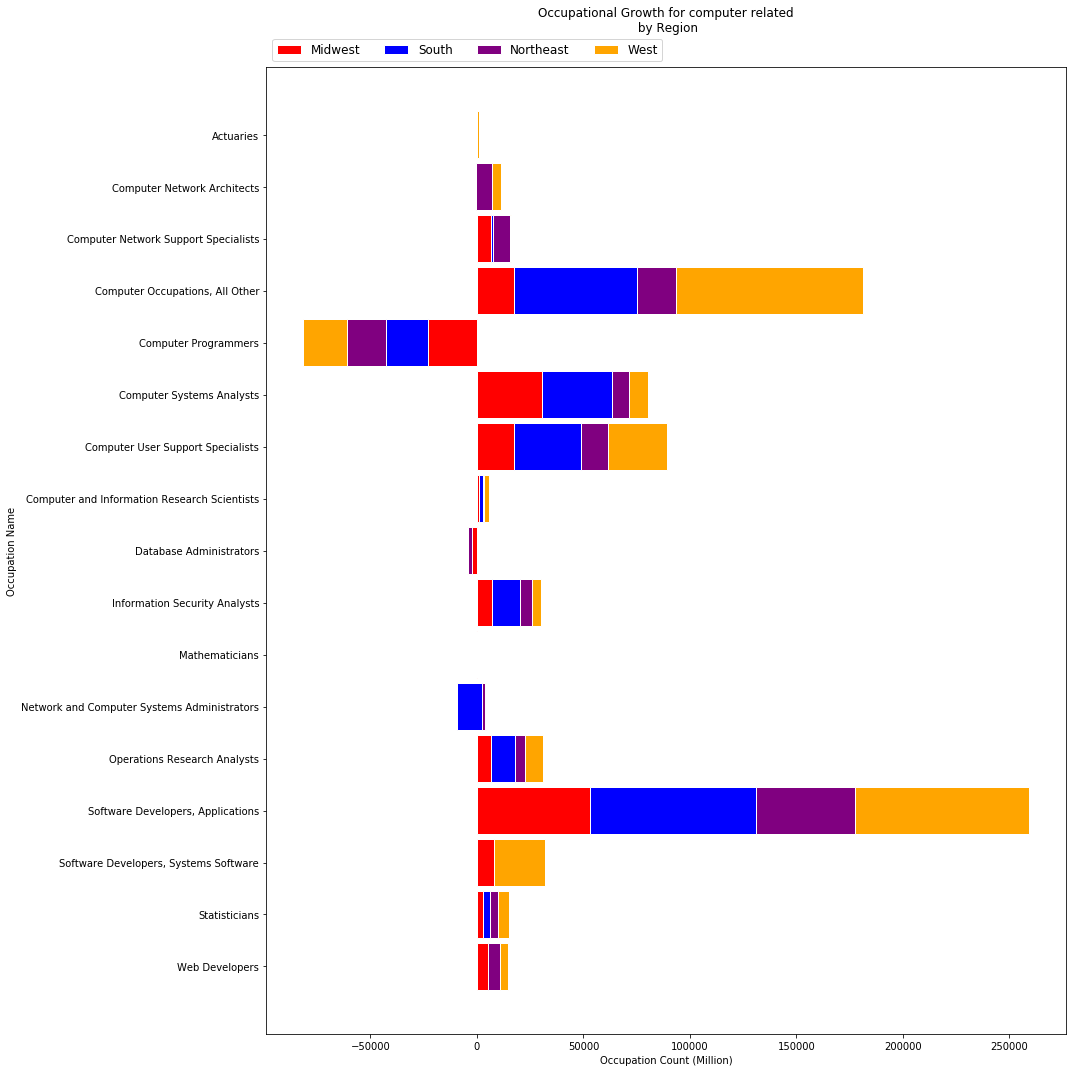

In [104]:
barWidth = 1
names= state_data.index.tolist() 

# Create graph bars
r = np.arange(len(names))

fig, ax = plt.subplots(figsize=(15,15))
font_prop = font_manager.FontProperties(size=9)

# Create bar graph for regions
ax.barh(names, state_data.Midwest, height=0.9, label='Midwest',  color='red', edgecolor='white')
xcenters = state_data.Midwest / 2

ax.barh(names, state_data.South, left=state_data.Midwest, height=0.9, label='South', color='blue', edgecolor='white')
xcenters = state_data.Midwest + (state_data.South / 2)

ax.barh(names, state_data.Northeast, left= (state_data.Midwest + state_data.South), height=0.9, label='Northeast', color='purple', edgecolor='white')
xcenters = state_data.Midwest + state_data.South + (state_data.Northeast / 2)

ax.barh(names, state_data.West, left= (state_data.Midwest + state_data.South + state_data.Northeast), height=0.9, label='West', color='orange', edgecolor='white')
xcenters = state_data.Midwest + state_data.South + state_data.Northeast + (state_data.Northeast / 2)

# labels read top-to-bottom
ax.invert_yaxis()  

#Label the axis and legend
ax.set_xlabel('Occupation Count (Million)')
ax.set_ylabel('Occupation Name')
ax.set_title('Occupational Growth for computer related\n by Region\n\n')
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')
plt.tight_layout()

#Save to file
plt.savefig("../output_charts/IT_Breakup_Region.png",bbox_inches = "tight")

# Show graphic
plt.show()

Based on the charte above, we think the highest growth area in IT jobs is in the following 5 areas
#15-1199	Computer Occupations, All Other
#15-1132	Software Developers, Applications
#15-1121	Computer Systems Analysts
#15-1133	Software Developers, Systems Software
#15-1151	Computer User Support Specialists

Now we will plot the growth of the IT selected jobs in the different states for the 5 year period. 
We take the 2013 numbers and add them by the state and then took the 2018 data and did the same and then created an change number per state and then plotted on a heat map

In [105]:



state_data_selected_IT_growth = state_data_selected[state_data_selected["OCC_CODE"].isin(['15-1199','15-1132','15-1121', '15-1151', '15-1133' ])]
state_data_selected_IT_growth.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE
64,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860
67,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400
68,AL,Alabama,15-1133,"Software Developers, Systems Software",4360,Alabama,"Software Developers, Systems Software",3840,520
73,AL,Alabama,15-1151,Computer User Support Specialists,5920,Alabama,Computer User Support Specialists,7180,-1260
75,AL,Alabama,15-1199,"Computer Occupations, All Other",1920,Alabama,"Computer Occupations, All Other",1660,260


In [106]:
# lets get the total by the state and then see a heat map on it
state_data_selected_IT_growth_state = state_data_selected_IT_growth.groupby(['ST'])

state_data_IT_growth = state_data_selected_IT_growth_state['EMP_CHANGE'].sum()
state_data_IT_growth = pd.DataFrame(state_data_IT_growth)

state_data_IT_growth = state_data_IT_growth.reset_index()
state_data_IT_growth.head()


,ST,EMP_CHANGE
0,AK,120
1,AL,60
2,AR,4270
3,AZ,16440
4,CA,133380


In [107]:
# Read  file with 'Lat' and 'Lng' data and create variable
state_lat_long = pd.read_excel('../Resources/state_lat_long.xlsx')

# Display 'Lat' and 'Lng' table by State
state_lat_long = state_lat_long.iloc[:, [0,1,2]]
state_lat_long.head()

,state,latitude,longitude
0,AK,63.588753,-154.493062
1,AL,32.318231,-86.902298
2,AR,35.201050,-91.831833
3,AZ,34.048928,-111.093731
4,CA,36.778261,-119.417932


In [108]:
state_data_selected_loc = state_data_IT_growth.merge(state_lat_long, how="inner", left_on="ST", right_on="state")
gmaps.configure(api_key=gkey)
#print(gkey)

state_data_selected_loc = state_data_selected_loc[state_data_selected_loc["EMP_CHANGE"] > 0]
locations = state_data_selected_loc[["latitude", "longitude"]]

# Store 'Change Rate' in a variable called 'change_rate'
change_rate = state_data_selected_loc["EMP_CHANGE"].astype(float)
#change_rate


In [109]:
# 
# Create the mapping figure
fig = gmaps.figure()

# Create the heatmap layer using locations 
heat_layer = gmaps.heatmap_layer(locations, weights=change_rate, 
                                 dissipating=False, max_intensity=25000,
                                 point_radius=2.0)
# Add heatmap layer to figure
fig.add_layer(heat_layer)

# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

Based on the heat map above, its very clear that for Data Engineering we are in the right place!!!!
Texas has significant job growth in the top 5 areas of the IT. 
In the categories, Data Engineering is not clearly segregated, but we are assuming it to be part of "Software Developers, Applications" and "Computer Systems Analysts".

In [110]:


# lets load the multiple years between 2013-18
state_data_2014 = pd.read_excel("../Resources/state_M2014_dl.xlsx")
state_data_2014 = pd.DataFrame(state_data_2014)
state_data_2014.head()
#print(state_data_selected_IT.head())

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,1857530,0.4,1000,1,...,14.83,23.95,36.04,17260,20220,30850,49810,74950,NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,67500,1.1,36.338,0.73,...,44.98,62.09,88.43,51050,68830,93550,129150,183940,NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1080,4.8,0.58,0.32,...,#,#,#,108270,140570,#,#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,26480,1.5,14.258,0.94,...,49,71.44,#,57510,74390,101930,148590,#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,1470,8.7,0.79,1.94,...,*,*,*,16120,17000,18450,20670,32820,True,NaN


In [111]:
state_data_2014_selected = state_data_2014.iloc[:, [1,2,3,4,6]]
state_data_2014_selected.rename(columns={"TOT_EMP": "TOT_EMP_2014"}, inplace=True)
# Merge the files for 2018 and 2013
state_data_selected_IT = state_data_selected_IT.merge(state_data_2014_selected, how="inner", on=["ST", "OCC_CODE"])
state_data_selected_IT.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,STATE,OCC_TITLE,TOT_EMP_2014
0,AL,Alabama,15-1111,Computer and Information Research Scientists,0,Alabama,Computer and Information Research Scientists,300,-300,Alabama,Computer and Information Research Scientists,380
1,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860,Alabama,Computer Systems Analysts,6110
2,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670,Alabama,Information Security Analysts,1270
3,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490,Alabama,Computer Programmers,5550
4,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400,Alabama,"Software Developers, Applications",3850


In [112]:
state_data_2015 = pd.read_excel("../Resources/state_M2015_dl.xlsx")
state_data_2015 = pd.DataFrame(state_data_2015)
#print(state_data_2015.head())
state_data_2015_selected = state_data_2015.iloc[:, [1,2,3,4,6]]
state_data_2015_selected.rename(columns={"TOT_EMP": "TOT_EMP_2015"}, inplace=True)
# Merge the files for 2018 and 2013
state_data_selected_IT = state_data_selected_IT.merge(state_data_2015_selected, how="inner", on=["ST", "OCC_CODE"])
state_data_selected_IT.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,STATE_x,OCC_TITLE_x,TOT_EMP_2014,STATE_y,OCC_TITLE_y,TOT_EMP_2015
0,AL,Alabama,15-1111,Computer and Information Research Scientists,0,Alabama,Computer and Information Research Scientists,300,-300,Alabama,Computer and Information Research Scientists,380,Alabama,Computer and Information Research Scientists,240
1,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860,Alabama,Computer Systems Analysts,6110,Alabama,Computer Systems Analysts,4170
2,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670,Alabama,Information Security Analysts,1270,Alabama,Information Security Analysts,1170
3,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490,Alabama,Computer Programmers,5550,Alabama,Computer Programmers,5850
4,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400,Alabama,"Software Developers, Applications",3850,Alabama,"Software Developers, Applications",4750


In [113]:
state_data_2016 = pd.read_excel("../Resources/state_M2016_dl.xlsx")
state_data_2016 = pd.DataFrame(state_data_2016)
#print(state_data_2016.head())
state_data_2016_selected = state_data_2016.iloc[:, [1,2,3,4,6]]
state_data_2016_selected.rename(columns={"TOT_EMP": "TOT_EMP_2016"}, inplace=True)
# Merge the files for 2018 and 2013
state_data_selected_IT = state_data_selected_IT.merge(state_data_2016_selected, how="inner", on=["ST", "OCC_CODE"])
state_data_selected_IT.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,STATE_x,OCC_TITLE_x,TOT_EMP_2014,STATE_y,OCC_TITLE_y,TOT_EMP_2015,STATE,OCC_TITLE,TOT_EMP_2016
0,AL,Alabama,15-1111,Computer and Information Research Scientists,0,Alabama,Computer and Information Research Scientists,300,-300,Alabama,Computer and Information Research Scientists,380,Alabama,Computer and Information Research Scientists,240,Alabama,Computer and Information Research Scientists,310
1,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860,Alabama,Computer Systems Analysts,6110,Alabama,Computer Systems Analysts,4170,Alabama,Computer Systems Analysts,4020
2,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670,Alabama,Information Security Analysts,1270,Alabama,Information Security Analysts,1170,Alabama,Information Security Analysts,970
3,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490,Alabama,Computer Programmers,5550,Alabama,Computer Programmers,5850,Alabama,Computer Programmers,6590
4,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400,Alabama,"Software Developers, Applications",3850,Alabama,"Software Developers, Applications",4750,Alabama,"Software Developers, Applications",5500


In [114]:
state_data_2017 = pd.read_excel("../Resources/state_M2017_dl.xlsx")
state_data_2017 = pd.DataFrame(state_data_2017)
#print(state_data_2017.head())
state_data_2017_selected = state_data_2017.iloc[:, [1,2,3,4,6]]
state_data_2017_selected.rename(columns={"TOT_EMP": "TOT_EMP_2017"}, inplace=True)
# Merge the files for 2018 and 2013
state_data_selected_IT = state_data_selected_IT.merge(state_data_2017_selected, how="inner", on=["ST", "OCC_CODE"])
state_data_selected_IT.head()

,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,STATE_x,...,TOT_EMP_2014,STATE_y,OCC_TITLE_y,TOT_EMP_2015,STATE_x,OCC_TITLE_x,TOT_EMP_2016,STATE_y,OCC_TITLE_y,TOT_EMP_2017
0,AL,Alabama,15-1121,Computer Systems Analysts,3910,Alabama,Computer Systems Analysts,5770,-1860,Alabama,...,6110,Alabama,Computer Systems Analysts,4170,Alabama,Computer Systems Analysts,4020,Alabama,Computer Systems Analysts,4010
1,AL,Alabama,15-1122,Information Security Analysts,1150,Alabama,Information Security Analysts,1820,-670,Alabama,...,1270,Alabama,Information Security Analysts,1170,Alabama,Information Security Analysts,970,Alabama,Information Security Analysts,1100
2,AL,Alabama,15-1131,Computer Programmers,7750,Alabama,Computer Programmers,5260,2490,Alabama,...,5550,Alabama,Computer Programmers,5850,Alabama,Computer Programmers,6590,Alabama,Computer Programmers,7420
3,AL,Alabama,15-1132,"Software Developers, Applications",6210,Alabama,"Software Developers, Applications",3810,2400,Alabama,...,3850,Alabama,"Software Developers, Applications",4750,Alabama,"Software Developers, Applications",5500,Alabama,"Software Developers, Applications",5540
4,AL,Alabama,15-1133,"Software Developers, Systems Software",4360,Alabama,"Software Developers, Systems Software",3840,520,Alabama,...,4520,Alabama,"Software Developers, Systems Software",4340,Alabama,"Software Developers, Systems Software",4000,Alabama,"Software Developers, Systems Software",3720


In [115]:
# lets plot the texas change over years on different jobs 
state_data_selected_IT_TX = state_data_selected_IT[state_data_selected_IT["OCC_CODE"].isin(['15-1199','15-1132','15-1121' , '15-1151', '15-1133' ])]

state_data_selected_IT_TX = state_data_selected_IT_TX[state_data_selected_IT["ST"].str.contains("TX")]
state_data_selected_IT_TX.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,ST,STATE_x,OCC_CODE,OCC_TITLE_x,TOT_EMP_2018,STATE_y,OCC_TITLE_y,TOT_EMP_2013,EMP_CHANGE,STATE_x,...,TOT_EMP_2014,STATE_y,OCC_TITLE_y,TOT_EMP_2015,STATE_x,OCC_TITLE_x,TOT_EMP_2016,STATE_y,OCC_TITLE_y,TOT_EMP_2017
651,TX,Texas,15-1121,Computer Systems Analysts,51710,Texas,Computer Systems Analysts,45710,6000,Texas,...,51700,Texas,Computer Systems Analysts,61870,Texas,Computer Systems Analysts,58680,Texas,Computer Systems Analysts,56220
654,TX,Texas,15-1132,"Software Developers, Applications",71260,Texas,"Software Developers, Applications",43540,27720,Texas,...,45800,Texas,"Software Developers, Applications",53460,Texas,"Software Developers, Applications",60550,Texas,"Software Developers, Applications",67850
655,TX,Texas,15-1133,"Software Developers, Systems Software",28720,Texas,"Software Developers, Systems Software",34500,-5780,Texas,...,38060,Texas,"Software Developers, Systems Software",35590,Texas,"Software Developers, Systems Software",30850,Texas,"Software Developers, Systems Software",25330
660,TX,Texas,15-1151,Computer User Support Specialists,60380,Texas,Computer User Support Specialists,54140,6240,Texas,...,58360,Texas,Computer User Support Specialists,60330,Texas,Computer User Support Specialists,57340,Texas,Computer User Support Specialists,57680
662,TX,Texas,15-1199,"Computer Occupations, All Other",25620,Texas,"Computer Occupations, All Other",12840,12780,Texas,...,14000,Texas,"Computer Occupations, All Other",13330,Texas,"Computer Occupations, All Other",16890,Texas,"Computer Occupations, All Other",19640


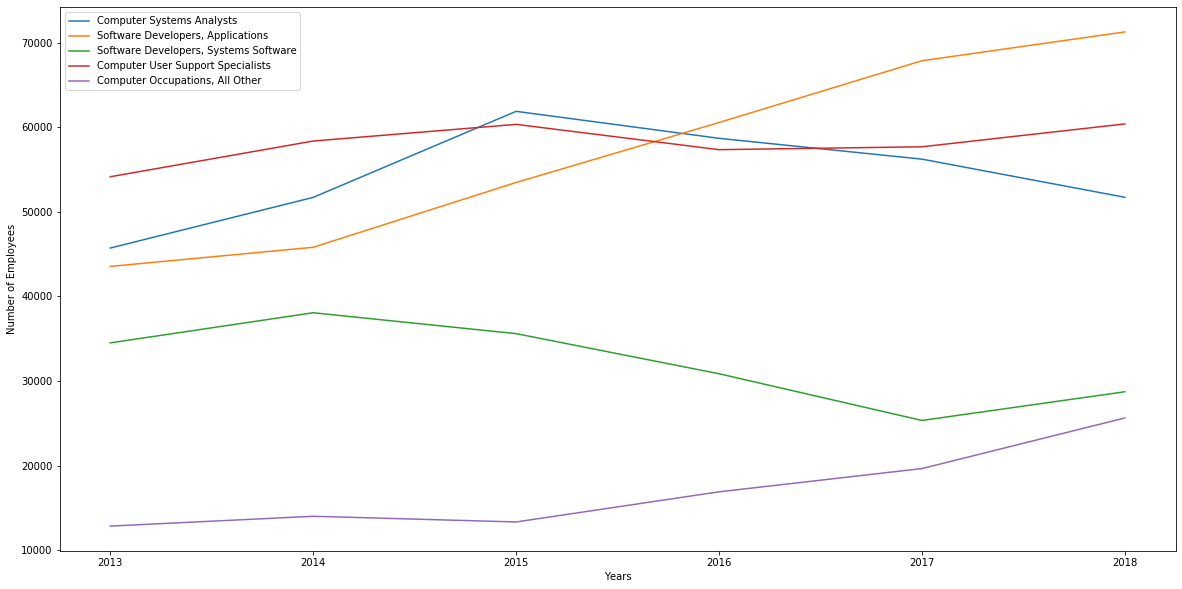

In [116]:
# Create a list of the years that we will use as our x axis
years = np.array([2013, 2014, 2015, 2016, 2017, 2018])
plt.figure(figsize=(20,10))
# Plot our line that will be used to track a wrestler's wins over the years
#for occu in state_data_selected_IT_TX:
#    print(occu)
for index, row in state_data_selected_IT_TX.iterrows():
# access data using column names
#    print(index, row["OCC_TITLE_x"], row['TOT_EMP_2018'], row['TOT_EMP_2017'], row['TOT_EMP_2016'])
    tot_emps_arr = np.array([row['TOT_EMP_2013'],  row['TOT_EMP_2014'],  row['TOT_EMP_2015'],  row['TOT_EMP_2016'],  row['TOT_EMP_2017'],  row['TOT_EMP_2018']])
    label_line = row[3]
#    print(label_line)
    plt.plot(years, tot_emps_arr, label=label_line)

# Plot our line that will be used to track a wrestler's losses over the years
#plt.plot(years, losses_over_time, color="blue", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc='upper left')

#plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Employees")

# Print our chart to the screen
plt.show()